In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data import
data = pd.read_csv('/home/jay/Elevate_lab_tasks/Datasets/diabetes_task_4.csv')

# data sample
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# data dimensions
data.shape

(768, 9)

In [4]:
# missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# data type
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# duplicates
data[data.duplicated].shape[0]

0

In [7]:
# analyse the target columns
round(data['Outcome'].value_counts(normalize=True)*100, 2)

Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64

In [8]:
# preparing the data for ML model

# dependency split
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# data scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
# logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(x_train_scaled, y_train)
print('Training Accuracy:', round(logreg_model.score(x_train_scaled, y_train)*100, 2), '%')

Training Accuracy: 77.04 %


Testing Accuracy: 75.32 %
Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



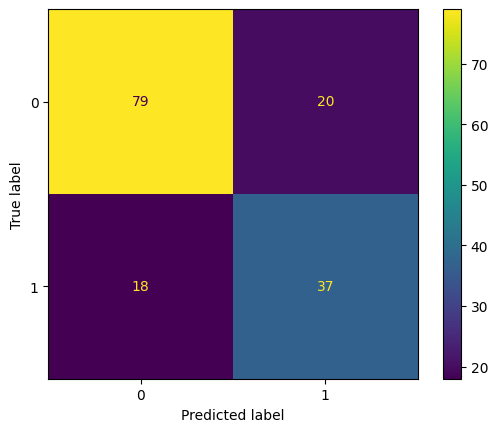

In [10]:
# Model testing
y_pred = logreg_model.predict(x_test_scaled)

# metrics
print('Testing Accuracy:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print('Classification Report:\n\n', classification_report(y_test, y_pred))

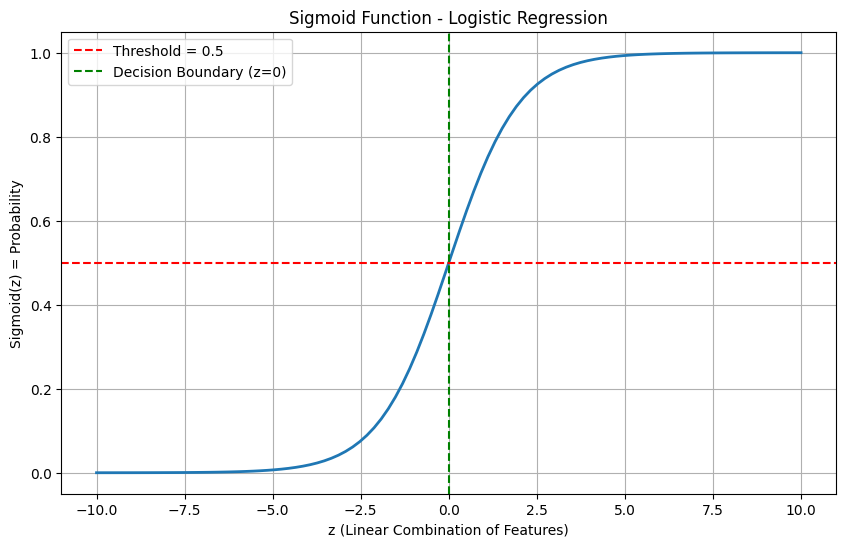


SIGMOID FUNCTION EXPLANATION:
- The sigmoid function maps any real number to a value between 0 and 1
- Formula: σ(z) = 1 / (1 + e^(-z))
- It converts the linear combination of features (z = w·x + b) into a probability
- Output represents the probability of belonging to class 1
- Default threshold is 0.5: 
  - If probability ≥ 0.5 → predict class 1
  - If probability < 0.5 → predict class 0



In [11]:
# Sigmoid Function Explanation

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# values for plotting
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Plot sigmoid curve
plt.figure(figsize=(10, 6))
plt.plot(z_values, sigmoid_values, linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold = 0.5')
plt.axvline(x=0, color='g', linestyle='--', label='Decision Boundary (z=0)')
plt.xlabel('z (Linear Combination of Features)')
plt.ylabel('Sigmoid(z) = Probability')
plt.title('Sigmoid Function - Logistic Regression')
plt.grid(True)
plt.legend()
plt.show()

print("""
SIGMOID FUNCTION EXPLANATION:
- The sigmoid function maps any real number to a value between 0 and 1
- Formula: σ(z) = 1 / (1 + e^(-z))
- It converts the linear combination of features (z = w·x + b) into a probability
- Output represents the probability of belonging to class 1
- Default threshold is 0.5: 
  - If probability ≥ 0.5 → predict class 1
  - If probability < 0.5 → predict class 0
""")

THRESHOLD TUNING RESULTS:
   threshold  accuracy  precision  recall  f1_score  tp  fp  fn  tn
0        0.3     0.688      0.545   0.764     0.636  42  35  13  64
1        0.4     0.714      0.585   0.691     0.633  38  27  17  72
2        0.5     0.753      0.649   0.673     0.661  37  20  18  79
3        0.6     0.786      0.750   0.600     0.667  33  11  22  88
4        0.7     0.779      0.818   0.491     0.614  27   6  28  93

OPTIMAL THRESHOLD: 0.60
Best F1-Score: 0.667


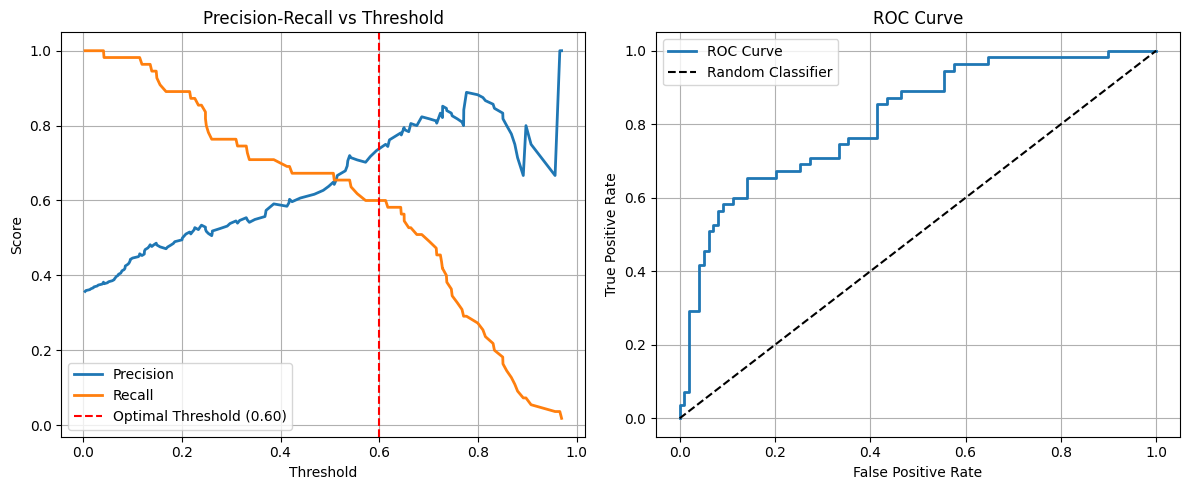


FINAL RESULTS WITH OPTIMAL THRESHOLD:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
[[88 11]
 [22 33]]


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve

# Get predicted probabilities
y_pred_proba = logreg_model.predict_proba(x_test_scaled)[:, 1]

# Function to evaluate different thresholds
def evaluate_thresholds(y_true, y_pred_proba, thresholds):
    results = []
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        accuracy = accuracy_score(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        results.append({
            'threshold': threshold,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn
        })
    
    return pd.DataFrame(results)

# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
threshold_results = evaluate_thresholds(y_test, y_pred_proba, thresholds)

print("THRESHOLD TUNING RESULTS:")
print(threshold_results.round(3))

# Find optimal threshold (maximizing F1-score)
optimal_idx = threshold_results['f1_score'].idxmax()
optimal_threshold = threshold_results.loc[optimal_idx, 'threshold']

print(f"\nOPTIMAL THRESHOLD: {optimal_threshold:.2f}")
print(f"Best F1-Score: {threshold_results.loc[optimal_idx, 'f1_score']:.3f}")

# Plot precision-recall tradeoff
plt.figure(figsize=(12, 5))

# Precision-Recall Curve
plt.subplot(1, 2, 1)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
plt.plot(thresholds_pr, precision[:-1], label='Precision', linewidth=2)
plt.plot(thresholds_pr, recall[:-1], label='Recall', linewidth=2)
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Final model with optimal threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

print("\nFINAL RESULTS WITH OPTIMAL THRESHOLD:")
print(classification_report(y_test, y_pred_optimal))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))